### Основная часть
### №1

In [7]:

import matplotlib.pyplot as plt

def visualise_polygons(polygons):
    """
    Основная функция, которая изуализирует последовательность плоских полигонов, полсудующи соеденяет точки (рисует фигуру).

        Args:
    
    polygons - итератор
    """
    polygons = list(polygons)

    fig, ax = plt.subplots(figsize=(8, 8))

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])


    screen = []
    for polygon in polygons:
        sorted_x = sorted(polygon, key = lambda x: x[0])
        sorted_y = sorted(polygon, key = lambda x: x[1])
        screen.append(abs(sorted_x[0][0]))
        screen.append(abs(sorted_x[len(polygon) - 1][0]))
        screen.append(abs(sorted_y[0][1]))
        screen.append(abs(sorted_y[len(polygon) - 1][1]))
    ax.set_xlim(-1 - max(screen), 1 + max(screen))
    ax.set_ylim(-1 - max(screen), 1 + max(screen))

    for polygon in polygons:
        x = [coord[0] for coord in polygon]
        y = [coord[1] for coord in polygon]
        fig_x = x + [x[0]]
        fig_y = y + [y[0]]
        ax.plot(fig_x, fig_y, linewidth=1, color = 'black')
    plt.show()


### №2

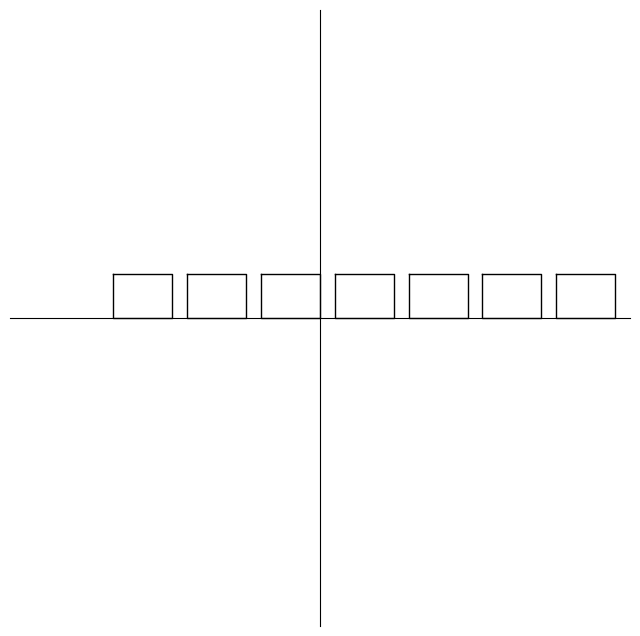

In [128]:
import itertools

def gen_rectangle(coords, space):
    """
    Генирирует конечную ленту прямоугольникосв, зависит от переменной space.

        Args:
        
    coords - координаты основново прямоугольника
    space - количество повторений прямоугольника

        yield:
    Возращает space-количесво координат прямоугольников
    """
    sorted_coords = sorted(coords, key = lambda x: (x[0], x[1]))
    x_side = abs(sorted_coords[0][0] - sorted_coords[3][0])

    positions = itertools.count(start = 0, step=x_side + space)
    for shift in positions:
        yield ((coords[0][0] + shift, coords[0][1]),
            (coords[1][0] + shift, coords[1][1]),
            (coords[2][0] + shift, coords[2][1]),
            (coords[3][0] + shift, coords[3][1])
            )
rectangles = itertools.islice(gen_rectangle(((-7, 1.5), (-5, 1.5), (-5, 0), (-7, 0)), 0.5), 7)
visualise_polygons(rectangles)

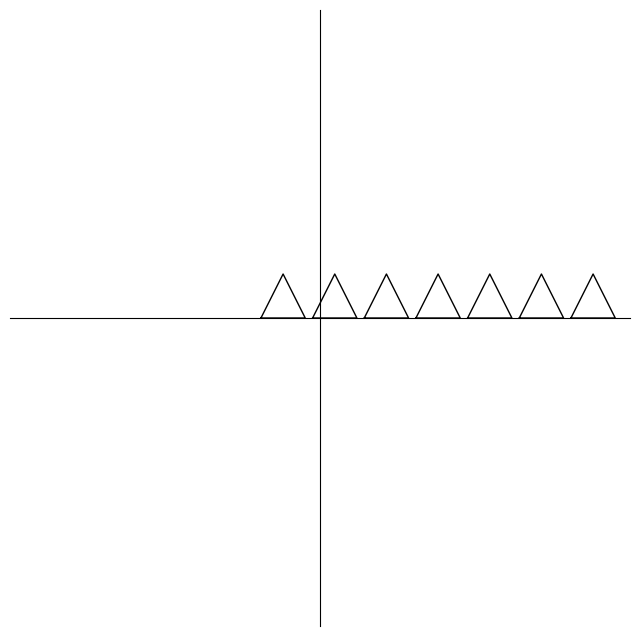

In [15]:
import itertools

def gen_triangle(coords, space):
    """
    Генирирует конечную ленту треугольников, зависит от переменной space.

        Args:
    coords - координаты основново треугольника
    space - количество повторений треугольника

        yield:
    Возращает space-количесво координат треугольников
    """
    
    srtd = sorted(coords, key = lambda x: (x[0], x[1]))
    x_side = abs(srtd[0][0] - srtd[2][0])
    positions = itertools.count(start = 0, step=x_side + space)
    for shift in positions:
        yield ((coords[0][0] + shift, coords[0][1]),
            (coords[1][0] + shift, coords[1][1]),
            (coords[2][0] + shift, coords[2][1]),
            )
triangles = itertools.islice(gen_triangle(((-4, 0), (-2.5, 3), (-1, 0)), 0.5), 7)
visualise_polygons(triangles)

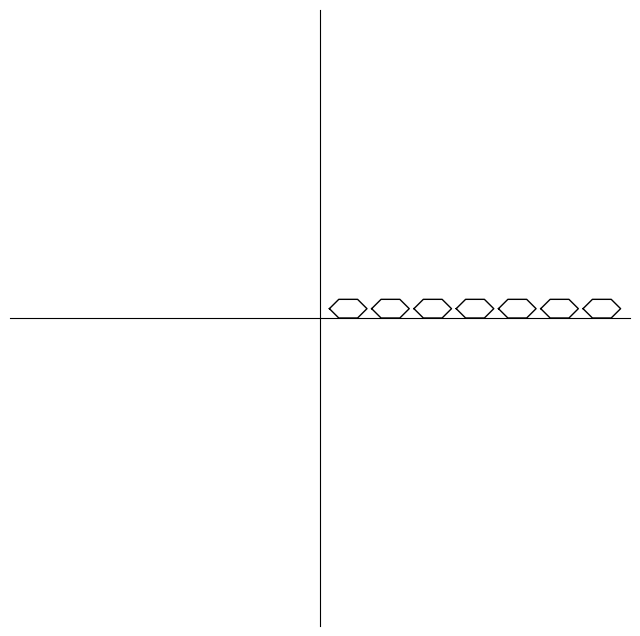

In [17]:
import itertools

def gen_hexagon(coords, space):
    """
    Генирирует конечную ленту шестиугольников, зависит от переменной space.

        Args:
    coords - координаты основново шестиугольника
    space - количество повторений шестиугольника

        yield:
    Возращает space-количесво координат шестиугольников
    """
    srtd = sorted(coords, key = lambda x: (x[0], x[1]))
    x_side = abs(srtd[0][0] - srtd[5][0])
    positions = itertools.count(start = 0, step=x_side + space)
    for shift in positions:
        yield ((coords[0][0] + shift, coords[0][1]),
            (coords[1][0] + shift, coords[1][1]),
            (coords[2][0] + shift, coords[2][1]),
            (coords[3][0] + shift, coords[3][1]),
            (coords[4][0] + shift, coords[4][1]),
            (coords[5][0] + shift, coords[5][1])
            )


hexagons = itertools.islice(gen_hexagon(((1,1), (2,2), (4,2), (5,1), (4,0), (2,0)), 0.5), 7)
visualise_polygons(hexagons)

### 3 задание

#### параллельный перенос

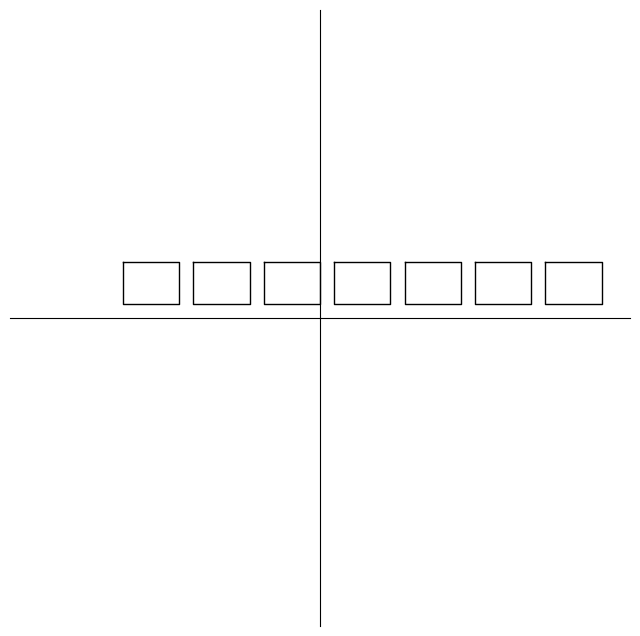

In [21]:
def tr_translate(polygons, space):
    """
    Параллельный перенос всех полигонов вдоль оси Y на величину 'space'

        Args:
        
    polygons - координаты ленты фигур
    space - отступ от оси

        return:
    Возращает координаты новых фигур с отступом 
    """
    def translate_polygon(polygon):
        return tuple((x, y + space) for x, y in polygon)

    return map(translate_polygon, polygons)

rectangles = itertools.islice(gen_rectangle(((-7, 1.5), (-5, 1.5), (-5, 0), (-7, 0)), 0.5), 7)
visualise_polygons(tr_translate(rectangles, 0.5))

#### поворот ( представлен на 45 градусов)

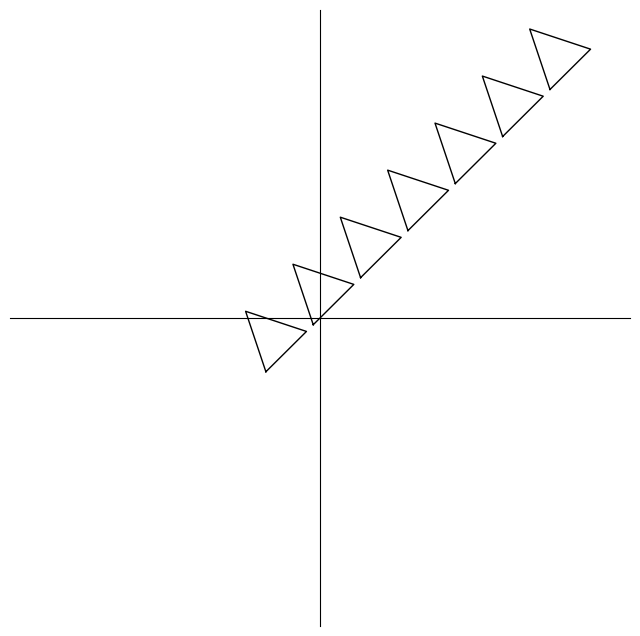

In [24]:
import math

def tr_rotate(polygons, angle_radians):
    """
    Поворот всех полигонов вокруг начала координат на заданный угол в радианах

        Args:

    polygons - координаты ленты фигур
    angle_radians - количество радиан для поворода

        return:

    Возращает новую ленту фигур повернутую по мат. формуле
    """
    cos_a = math.cos(angle_radians)
    sin_a = math.sin(angle_radians)

    def rotate_polygon(polygon):
        """
        Функция применения формулы к координатам

            Args:

        polygons - координаты фигуры

            return:

        Возращает координаты помножинные на синус и косинус
        """
        return tuple((
            x * cos_a - y * sin_a,
            x * sin_a + y * cos_a
        ) for x, y in polygon)

    return map(rotate_polygon, polygons)

triangles = itertools.islice(gen_triangle(((-4, 0), (-2.5, 3), (-1, 0)), 0.5), 7)
visualise_polygons(tr_rotate(triangles, math.pi / 4)) 

#### симметрия

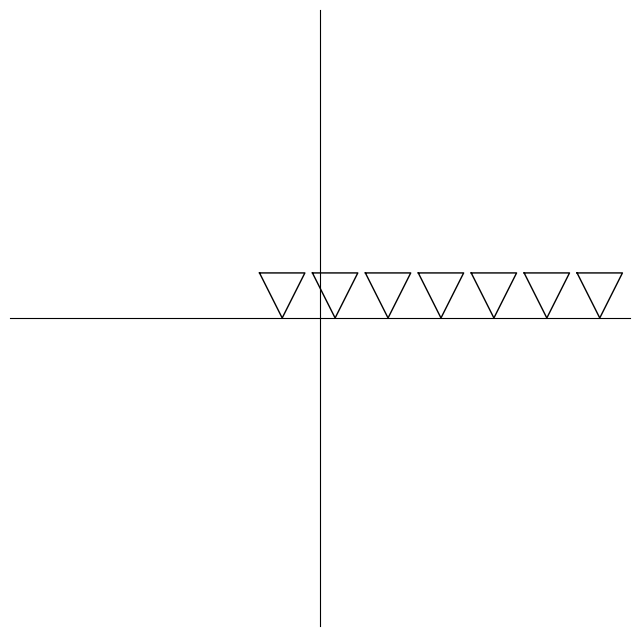

In [103]:
def tr_symmetry(polygons, space):
    """
    Симметрия полигонов относительно горизонтальной оси

        Args:

    polygons - координаты ленты фигур
    space - на сколько будет поднята лента фигур

        return:

    Возращает новую симметричную, отностительно оси Х, ленту фигур 
    """
    polygons = list(polygons)
    max_y = max(coord[1] for polygon in polygons for coord in polygon)

    def symmetry_polygon(polygon):
        """
        Функция применения формулы к координатам

            Args:

        polygons - координаты фигуры

            return:

        Возращает координаты симметричные изначальным
        """
        return tuple((x, abs(max_y) - y + 2 * space) for x, y in polygon)

    return map(symmetry_polygon, polygons)

triangles = itertools.islice(gen_triangle(((-4, 0), (-2.5, 3), (-1, 0)), 0.5), 7)
visualise_polygons(tr_symmetry(triangles, 0))

#### гомотетия

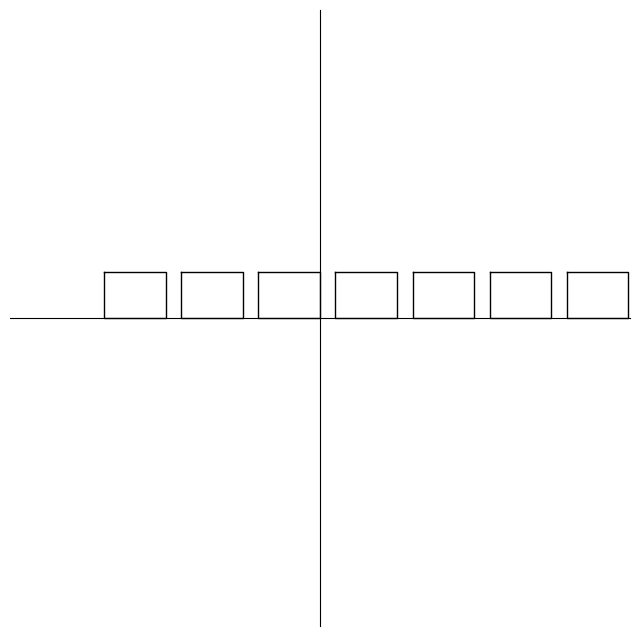

In [123]:
def tr_homothety(polygons, k, space = None):
    """
    Гомотетия всех полигонов относительно начала координат с коэффициентом k

    Args:

    polygons - координаты ленты фигур
    k - перемена маштабирования

        return:

    Возращает маштабируюю ленту фигур
    """
    def scale_polygon(polygon):
        """
        Функция маштабирования координат

            Args:
            
        polygon - координаты

            return:

        Ленту фигур помноженных на К
        """
        return tuple((k * x, k * y) for x, y in polygon)

    return map(scale_polygon, polygons)

rectangles = itertools.islice(gen_rectangle(((-7, 1.5), (-5, 1.5), (-5, 0), (-7, 0)), 0.5), 7)
visualise_polygons(tr_homothety(rectangles, 10))

### №4

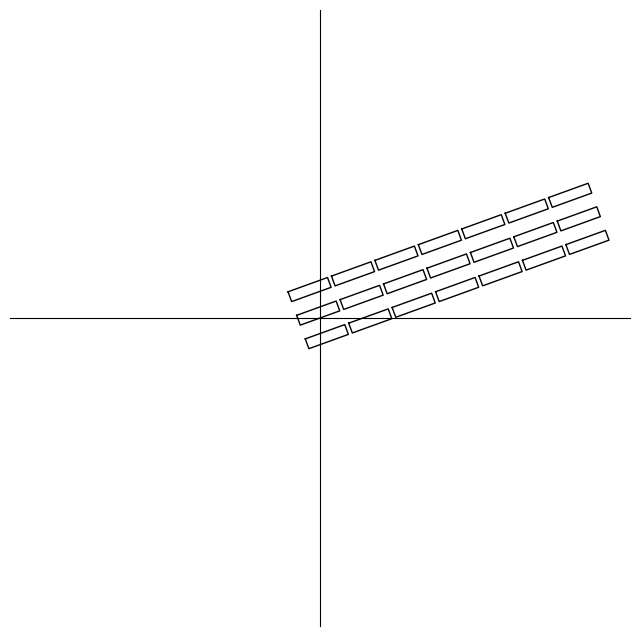

In [38]:
def slanted_rectangles():
    """
    Функция создания 3-х последовательных накреннех линий прямоугольников

        return:

    Последовательно возращает одну из 3-х лент фигур
    """
    base = gen_rectangle(((-1, 0.5), (1, 0.5), (1, 0), (-1, 0)), 0.2)
    l1 = tr_rotate(tr_translate(itertools.islice(base, 7), 0), math.radians(20))
    l2 = tr_rotate(tr_translate(itertools.islice(gen_rectangle(((-1, 0.5), (1, 0.5), (1, 0), (-1, 0)), 0.2), 7), 1.2), math.radians(20))
    l3 = tr_rotate(tr_translate(itertools.islice(gen_rectangle(((-1, 0.5), (1, 0.5), (1, 0), (-1, 0)), 0.2), 7), -1.2), math.radians(20))
    return itertools.chain(l1, l2, l3)

visualise_polygons(slanted_rectangles())


пересечение

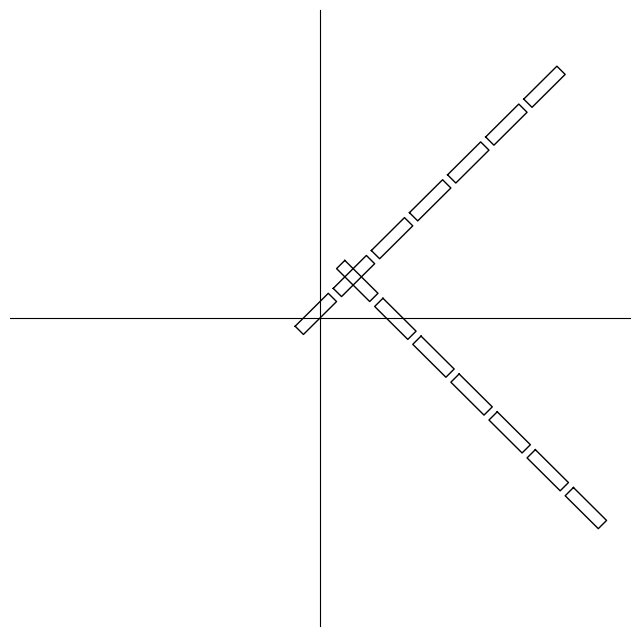

In [41]:
def crossing_rectangles():
    """
    Создает пересеченные ленты из прямоугольников

        return:

    Возращает последовательно каждую ленту фигур
    """
    base1 = gen_rectangle(((-1, 0.5), (1, 0.5), (1, 0), (-1, 0)), 0.3)
    l1 = tr_rotate(itertools.islice(base1, 7), math.radians(45))

    base2 = gen_rectangle(((-1, 0.5), (1, 0.5), (1, 0), (-1, 0)), 0.3)
    shifted = tr_translate(base2, 2)  # Сдвигаем вверх
    l2 = tr_rotate(itertools.islice(shifted, 7), math.radians(-45))

    return itertools.chain(l1, l2)

visualise_polygons(crossing_rectangles())

#### Симметричные треугольники

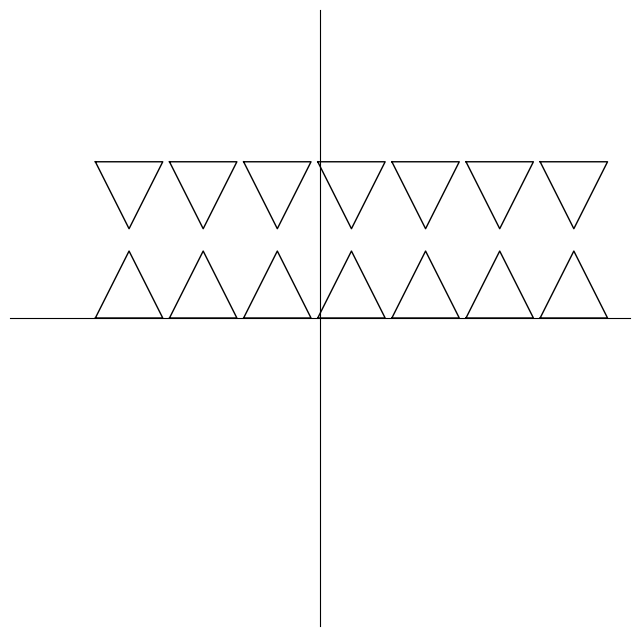

In [44]:
rectangles = itertools.islice(gen_triangle(((-10, 0), (-7, 0), (-8.5, 3)), 0.3), 7)
list_first = list(rectangles)
list_second = list(tr_symmetry(iter(list_first),2))
final = iter(list_first + list_second)
visualise_polygons(final)

#### последовательность трапеций

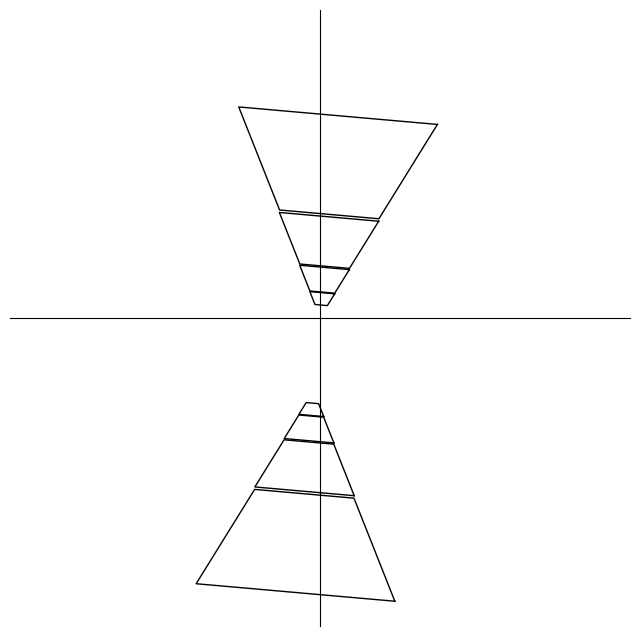

In [47]:
polygons = iter([((-4, -8.2), (4, -8.2), (2, -4.2), (-2, -4.2))])
list_first = list(polygons)
list_second = list(tr_homothety(iter(list_first), 1/2))
list_third = list(tr_homothety(iter(list_second), 1/2))
list_forth = list(tr_homothety(iter(list_third), 1/2))
final = iter(list_first + list_second + list_third + list_forth)
list_final = list(final)
symmetry = tr_symmetry(iter(list_final), 1.2)
rotated = tr_rotate(iter(list_final + list(symmetry)), 135)
visualise_polygons(rotated)

### №5

In [50]:
def flt_angle_point(polygon, point):
    """
    Функция для фильтрации полигона по совпадающему с заданным углу

        Args:
        
    polygon -  координаты
    point -  координаты заданного угла

        return:

    Возращает координату или же ничего
    """

    if point in polygon:
        return polygon


def flt_short_side(polygon, side):
    """
    Функция для фильтрации полигона если кратчайшая сторона меньше заданного значения

        Args:
        
    polygon - координаты
    side -  заданное значение

        return:

    Возращает полигон
    """

    sides = []
    for indx in range(len(polygon)):
        if indx != len(polygon) - 1:
            x_side = abs(polygon[indx][0] - polygon[indx + 1][0])
            y_side = abs(polygon[indx][1] - polygon[indx + 1][1])
            sides.append((x_side ** 2 + y_side ** 2) ** (1 / 2))
    if min(sides) < side:
        return polygon

#### Фильт фигур

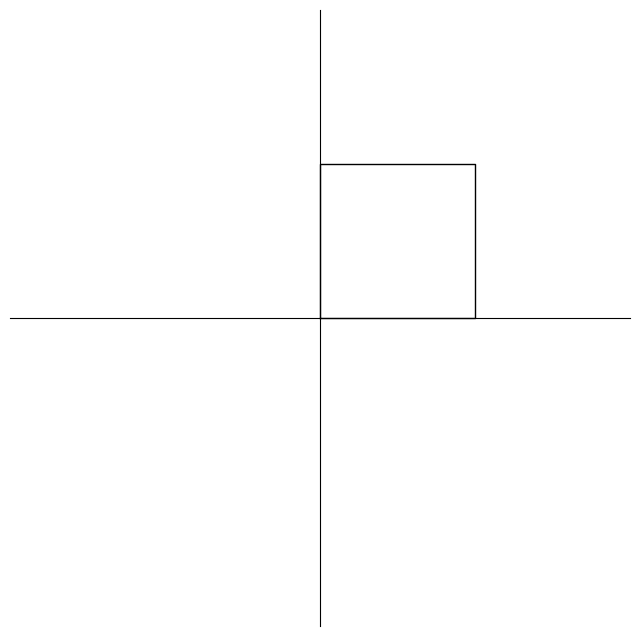

In [53]:
iterator = iter([((0, 0), (1, 0), (1, 1), (0, 1)), ((1, 1), (1, 2), (2, 2), (2, 1))])
filtered = filter(lambda pol: flt_angle_point(pol, (1, 0)), iterator)
visualise_polygons(filtered)

#### фильт фигур

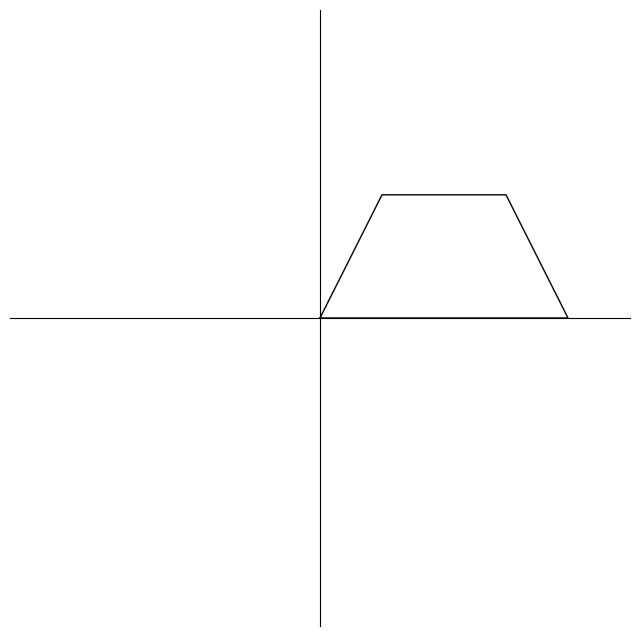

In [56]:
iterator = iter([((0, 0), (1, 2), (3, 2), (4, 0)), ((0, 0), (0, 10), (10, 10), (10, 0))])
filtered = filter(lambda pol: flt_short_side(pol, 3), iterator)
visualise_polygons(filtered)

### №6

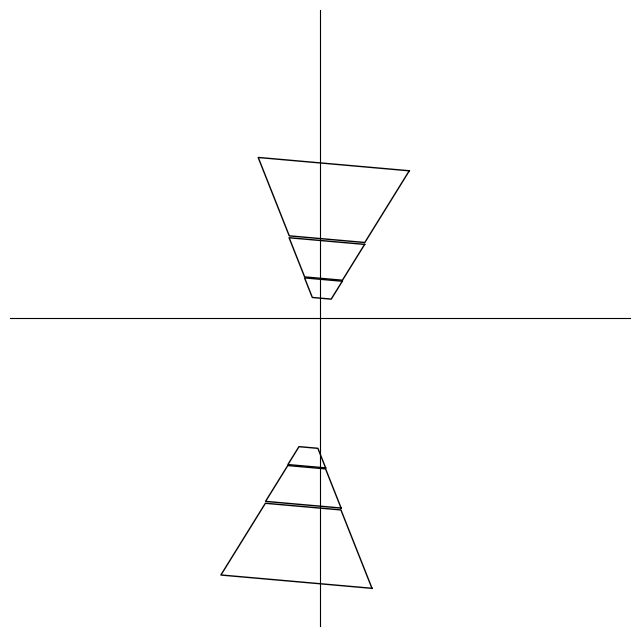

In [60]:
polygons = iter([((-4, -8.2), (4, -8.2), (2, -4.2), (-2, -4.2))])
list_first = list(polygons)
list_second = list(tr_homothety(iter(list_first), 1/2))
list_third = list(tr_homothety(iter(list_second), 1/2))
list_forth = list(tr_homothety(iter(list_third), 1/2))
final = iter(list_first + list_second + list_third + list_forth)
list_final = list(final)
symmetry = tr_symmetry(iter(list_final), 1.2)
rotated = tr_rotate(iter(list_final + list(symmetry)), 135)
filtered = filter(lambda pol: flt_short_side(pol, 3.5), rotated)
visualise_polygons(filtered)

### №7

In [63]:
import functools

def dec_tr_translate(space_param):
    """
    Декоратор на основе функции tr_translate.

        Args:
        
    space_param - отступ параллельно перенесенной последовательности от исходных значений

        Return:
    decorator - задекорировання функция
    """

    def decorator(func):
        @functools.wraps(func)
        def wrapper(*args):
            new_args = list(args)
            new_args[0] =  tr_translate(new_args[0], space = space_param)
            result = func(*new_args)
            return result
        return wrapper
    return decorator


def dec_tr_rotate(angle):
    """
    Декоратор на основе функции tr_rotate.

        Args:
        
    angle - угол поворота последовательности

        Return:
        
    decorator - задекорировання функция
        """

    def decorator(func):
        @functools.wraps(func)
        def wrapper(*args):
            new_args = list(args)
            new_args[0] =  tr_rotate(new_args[0], angle_radians = angle)
            result = func(*new_args)
            return result
        return wrapper
    return decorator


def dec_tr_symmetry(space_param):
    """
    Декоратор на основе функции tr_symmetry.

        Args:
        
    space_param - отступ симметрично перенесенной последовательности от исходных значений

        Return:
        
    decorator - задекорировання функция
        """

    def decorator(func):
        @functools.wraps(func)
        def wrapper(*args):
            new_args = list(args)
            new_args[0] =  tr_symmetry(new_args[0], space = space_param)
            result = func(*new_args)
            return result
        return wrapper
    return decorator


def dec_tr_homothety(k, space_param):
    """
    Декоратор на основе функции tr_homothety.

        Args:
        
    space_param - отступ подобной последовательности от исходных значений
    k - коэфицент подобия

        Return:
        
    decorator - задекорировання функция
        """

    def decorator(func):
        @functools.wraps(func)
        def wrapper(*args):
            new_args = list(args)
            new_args[0] =  tr_homothety(new_args[0], k = k, space = space_param)
            result = func(*new_args)
            return result
        return wrapper
    return decorator


#### преобразующие многоугольники в итераторах среди аргументов функции, работающие на основе функций из п. 3: @tr_translate, @tr_rotate, @tr_symmetry, @tr_homothety.

##### 1. @tr_translate

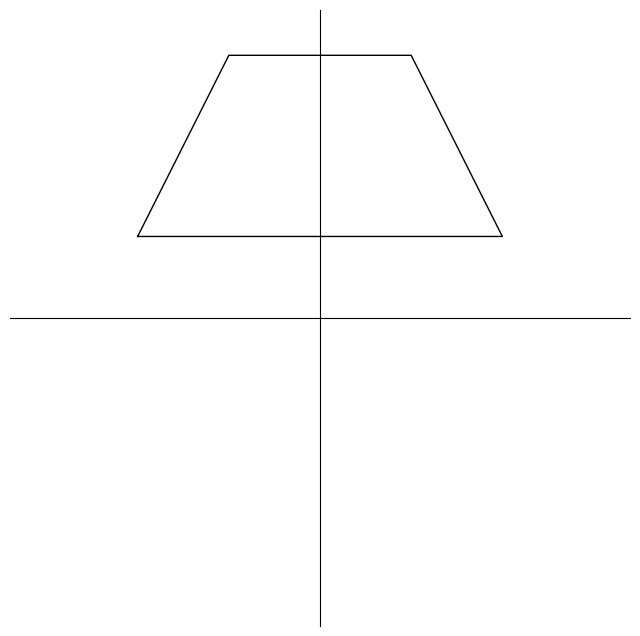

In [138]:
polygons = iter([((-4, -8.2), (4, -8.2), (2, -4.2), (-2, -4.2))])

@dec_tr_translate(10)
def visualise_polygons(iterable_polygons):
    """
    Основная функция, которая визуализирует последовательность плоских полигонов, полследующи соеденяет точки (рисует фигуру).

        Args:
    
    polygons - итератор
    """

    polygons = list(iterable_polygons)

    fig, ax = plt.subplots(figsize=(8, 8))

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

    border = []
    for polygon in polygons:
        sorted_by_x = sorted(polygon, key = lambda x: x[0])
        sorted_by_y = sorted(polygon, key = lambda x: x[1])
        border.append(abs(sorted_by_x[0][0]))
        border.append(abs(sorted_by_x[len(polygon) - 1][0]))
        border.append(abs(sorted_by_y[0][1]))
        border.append(abs(sorted_by_y[len(polygon) - 1][1]))
    ax.set_xlim(-1 - max(border), 1 + max(border))
    ax.set_ylim(-1 - max(border), 1 + max(border))

    for polygon in polygons:
        x = [coord[0] for coord in polygon]
        y = [coord[1] for coord in polygon]
        x_closed = x + [x[0]]
        y_closed = y + [y[0]]
        ax.plot(x_closed, y_closed, linewidth=1, color = 'black')
    plt.show()

visualise_polygons(polygons)

##### 2. @tr_rotate

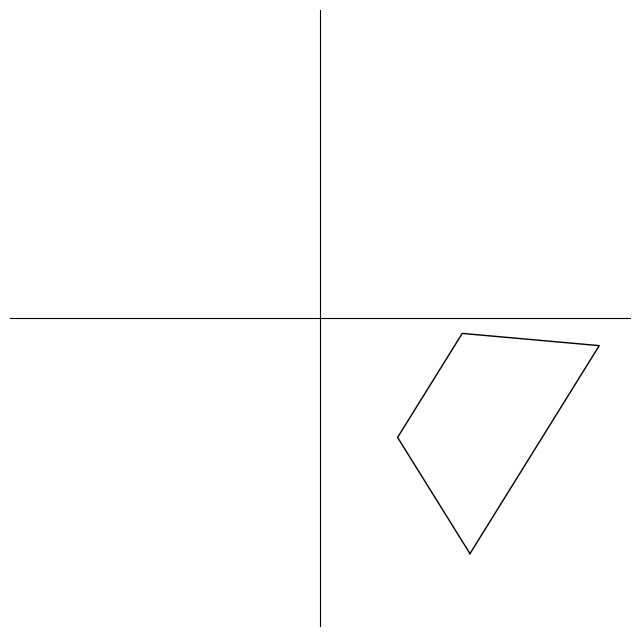

In [70]:
polygons = iter([((-4, -8.2), (4, -8.2), (2, -4.2), (-2, -4.2))])

@dec_tr_rotate(45)
def visualise_polygons(iterable_polygons):
    """
    Основная функция, которая визуализирует последовательность плоских полигонов, полследующи соеденяет точки (рисует фигуру).

        Args:
    
    polygons - итератор
    """

    polygons = list(iterable_polygons)

    fig, ax = plt.subplots(figsize=(8, 8))

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

    border = []
    for polygon in polygons:
        sorted_by_x = sorted(polygon, key = lambda x: x[0])
        sorted_by_y = sorted(polygon, key = lambda x: x[1])
        border.append(abs(sorted_by_x[0][0]))
        border.append(abs(sorted_by_x[len(polygon) - 1][0]))
        border.append(abs(sorted_by_y[0][1]))
        border.append(abs(sorted_by_y[len(polygon) - 1][1]))
    ax.set_xlim(-1 - max(border), 1 + max(border))
    ax.set_ylim(-1 - max(border), 1 + max(border))

    for polygon in polygons:
        x = [coord[0] for coord in polygon]
        y = [coord[1] for coord in polygon]
        x_closed = x + [x[0]]
        y_closed = y + [y[0]]
        ax.plot(x_closed, y_closed, linewidth=1, color = 'black')
    plt.show()

visualise_polygons(polygons)

##### 3.@tr_symmetry

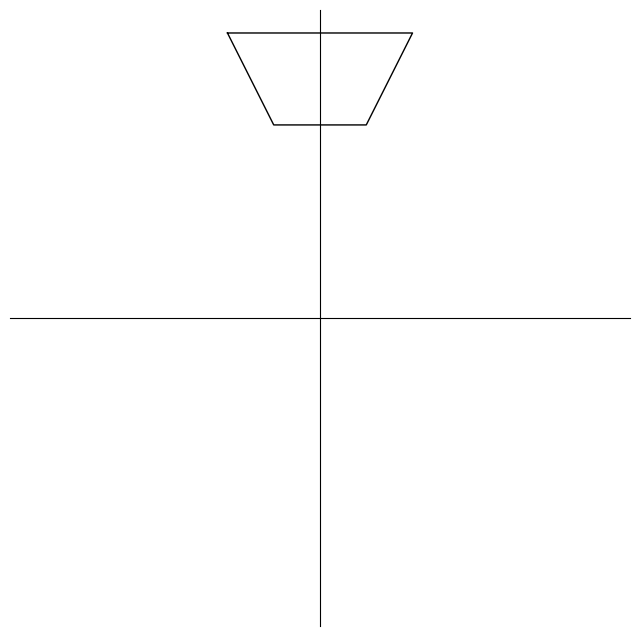

In [73]:
polygons = iter([((-4, -8.2), (4, -8.2), (2, -4.2), (-2, -4.2))])

@dec_tr_symmetry(0)
def visualise_polygons(iterable_polygons):
    """
    Основная функция, которая визуализирует последовательность плоских полигонов, полследующи соеденяет точки (рисует фигуру).

        Args:
    
    polygons - итератор
    """

    polygons = list(iterable_polygons)

    fig, ax = plt.subplots(figsize=(8, 8))

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

    border = []
    for polygon in polygons:
        sorted_by_x = sorted(polygon, key = lambda x: x[0])
        sorted_by_y = sorted(polygon, key = lambda x: x[1])
        border.append(abs(sorted_by_x[0][0]))
        border.append(abs(sorted_by_x[len(polygon) - 1][0]))
        border.append(abs(sorted_by_y[0][1]))
        border.append(abs(sorted_by_y[len(polygon) - 1][1]))
    ax.set_xlim(-1 - max(border), 1 + max(border))
    ax.set_ylim(-1 - max(border), 1 + max(border))

    for polygon in polygons:
        x = [coord[0] for coord in polygon]
        y = [coord[1] for coord in polygon]
        x_closed = x + [x[0]]
        y_closed = y + [y[0]]
        ax.plot(x_closed, y_closed, linewidth=1, color = 'black')
    plt.show()

visualise_polygons(polygons)

##### 4. @tr_homothety

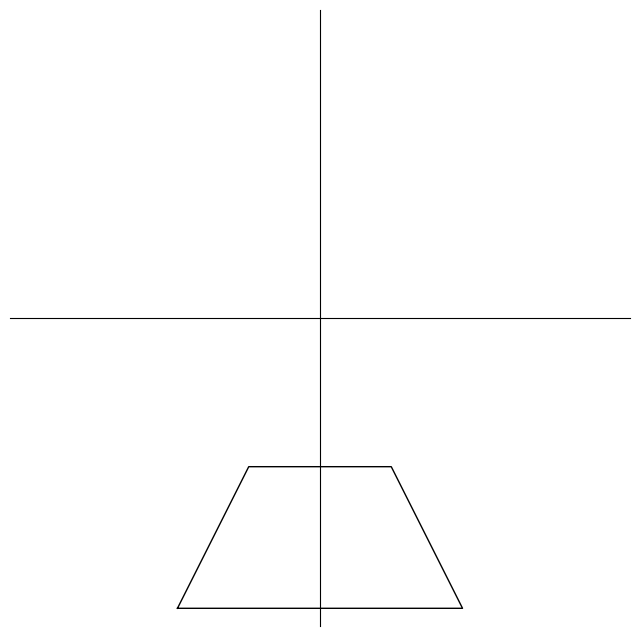

In [76]:
polygons = iter([((-4, -8.2), (4, -8.2), (2, -4.2), (-2, -4.2))])

@dec_tr_homothety(2, 0)
def visualise_polygons(iterable_polygons):
    """
    Основная функция, которая визуализирует последовательность плоских полигонов, полследующи соеденяет точки (рисует фигуру).

        Args:
    
    polygons - итератор
    """

    polygons = list(iterable_polygons)

    fig, ax = plt.subplots(figsize=(8, 8))

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

    border = []
    for polygon in polygons:
        sorted_by_x = sorted(polygon, key = lambda x: x[0])
        sorted_by_y = sorted(polygon, key = lambda x: x[1])
        border.append(abs(sorted_by_x[0][0]))
        border.append(abs(sorted_by_x[len(polygon) - 1][0]))
        border.append(abs(sorted_by_y[0][1]))
        border.append(abs(sorted_by_y[len(polygon) - 1][1]))
    ax.set_xlim(-1 - max(border), 1 + max(border))
    ax.set_ylim(-1 - max(border), 1 + max(border))

    for polygon in polygons:
        x = [coord[0] for coord in polygon]
        y = [coord[1] for coord in polygon]
        x_closed = x + [x[0]]
        y_closed = y + [y[0]]
        ax.plot(x_closed, y_closed, linewidth=1, color = 'black')
    plt.show()

visualise_polygons(polygons)